## Practice Exercise 2

In this assignment, you will try to find some interesting insights into a few movies released between 1916 and 2016, using Python. You will have to download a movie dataset, write Python code to explore the data, gain insights into the movies, actors, directors, and collections, and submit the code.

#### Some tips before starting the assignment

1. Identify the task to be performed correctly, and only then proceed to write the required code. Don’t perform any incorrect analysis or look for information that isn’t required for the assignment.
2. In some cases, the variable names have already been assigned, and you just need to write code against them. In other cases, the names to be given are mentioned in the instructions. We strongly advise you to use the mentioned names only.
3. Always keep inspecting your data frame after you have performed a particular set of operations.
4. There are some checkpoints given in the IPython notebook provided. They're just useful pieces of information you can use to check if the result you have obtained after performing a particular task is correct or not.
5. Note that you will be asked to refer to documentation for solving some of the questions. That is done on purpose for you to learn new commands and also how to use the documentation.

In [1]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

### Task 1: Reading and Inspection

**Subtask 1.1: Import and read**

Import and read the movie database. Store it in a variable called `movies`.

In [80]:
# Write your code for importing the csv file here
movies = pd.read_csv("Movies.csv")
movies.shape

(3853, 28)

**Subtask 1.2: Inspect the dataframe**

Inspect the dataframe's columns, shapes, variable types etc.

In [81]:
# Write your code for inspection here
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3851 non-null   object 
 1   director_name              3853 non-null   object 
 2   num_critic_for_reviews     3852 non-null   float64
 3   duration                   3852 non-null   float64
 4   director_facebook_likes    3853 non-null   float64
 5   actor_3_facebook_likes     3847 non-null   float64
 6   actor_2_name               3852 non-null   object 
 7   actor_1_facebook_likes     3853 non-null   float64
 8   gross                      3853 non-null   float64
 9   genres                     3853 non-null   object 
 10  actor_1_name               3853 non-null   object 
 11  movie_title                3853 non-null   object 
 12  num_voted_users            3853 non-null   int64  
 13  cast_total_facebook_likes  3853 non-null   int64

In [82]:
(movies.isnull().sum() > 0).sum()

12

#### <font color='red'>Question 1: How many rows and columns are present in the dataframe? </font>
-  <font color='red'>(3821, 26)</font>
-  <font color='red'>(3879, 28)</font>
-  <font color='red'>(3853, 28)</font>
-  <font color='red'>(3866, 26)</font>

#### <font color='red'>Question 2: How many columns have null values present in them? Try writing a code for this instead of counting them manually.</font>

-  <font color='red'>3</font>
-  <font color='red'>6</font>
-  <font color='red'>9</font>
-  <font color='red'>12</font>

### Task 2: Cleaning the Data

**Subtask 2.1: Drop unecessary columns**

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [83]:
# Check the 'drop' function in the Pandas library - dataframe.drop(list_of_unnecessary_columns, axis = )
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations

movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],inplace=True,axis=1)

In [50]:
movies.shape

(3853, 13)

#### <font color='red'>Question 3: What is the count of columns in the new dataframe? </font>
-  <font color='red'>10</font>
-  <font color='red'>13</font>
-  <font color='red'>15</font>
-  <font color='red'>17</font>

**Subtask 2.2: Inspect Null values**

As you have seen above, there are null values in multiple columns of the dataframe 'movies'. Find out the percentage of null values in each column of the dataframe 'movies'. 

In [84]:
# Write you code here
movies.isnull().sum() #mycode
round(100*(movies.isnull().sum()/len(movies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.10
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

#### <font color='red'>Question 4: Which column has the highest percentage of null values? </font>
-  <font color='red'>language</font>
-  <font color='red'>genres</font>
-  <font color='red'>num_critic_for_reviews</font>
-  <font color='red'>imdb_score</font>

**Subtask 2.3: Fill NaN values**

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [96]:
# Write your code for filling the NaN values in the 'language' column here
movies["language"].fillna('English',inplace=True)
movies[movies["language"] == 'English'].describe()

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
count,3674.000000,3.675000e+03,3.675000e+03,3675.000000,3.675000e+03,3675.000000,3675.000000,3675.000000
mean,164.203321,5.314192e+07,1.044872e+05,332.371429,3.893715e+07,2003.028571,6.423401,9261.533061
std,124.938248,7.018287e+07,1.521596e+05,411.251788,4.445843e+07,9.992403,1.049111,21630.049351
min,1.000000,1.620000e+02,5.000000e+00,1.000000,2.180000e+02,1920.000000,1.600000,0.000000
25%,73.000000,8.724046e+06,1.799000e+04,105.000000,1.000000e+07,1999.000000,5.800000,0.000000
50%,134.000000,3.052357e+07,5.285200e+04,207.000000,2.500000e+07,2005.000000,6.500000,215.000000
75%,222.000000,6.772736e+07,1.269115e+05,396.500000,5.000000e+07,2010.000000,7.100000,11000.000000
max,813.000000,7.605058e+08,1.689764e+06,5060.000000,6.000000e+08,2016.000000,9.300000,349000.000000


In [99]:
movies.loc[pd.isnull(movies['language']), ['language']] = 'English'
(movies.language == 'English')

0        True
1        True
2        True
3        True
4        True
        ...  
3848     True
3849     True
3850    False
3851     True
3852     True
Name: language, Length: 3853, dtype: bool

#### <font color='red'>Question 5: What is the count of movies made in English language after replacing the NaN values with English? </font>
-  <font color='red'>3670</font>
-  <font color='red'>3674</font>
-  <font color='red'>3668</font>
-  <font color='red'>3672</font>

### Task 3: Data Analysis

**Subtask 3.1: Change the unit of columns**

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [102]:
# Write your code for unit conversion here
movies["Net Profit"] = movies["gross"] - movies["budget"]
movies.sort_values("Net Profit",ascending=False)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Net Profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,2.370000e+08,2009.0,7.9,33000,5.235058e+08
28,Colin Trevorrow,644.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,1.500000e+08,2015.0,7.0,150000,5.021773e+08
25,James Cameron,315.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,2.000000e+08,1997.0,7.7,26000,4.586723e+08
2704,George Lucas,282.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,1.100000e+07,1977.0,8.7,33000,4.499357e+08
2748,Steven Spielberg,215.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,1.050000e+07,1982.0,7.9,34000,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Katsuhiro Ôtomo,105.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2.127520e+09,2004.0,6.9,973,-2.127110e+09
2136,Hayao Miyazaki,174.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2.400000e+09,1997.0,8.4,11000,-2.397702e+09
2693,Lajos Koltai,73.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2.500000e+09,2005.0,7.1,607,-2.499804e+09
3282,Chan-wook Park,202.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,4.200000e+09,2005.0,7.7,4000,-4.199788e+09


**Subtask 3.2: Find the movies with highest profit**

   1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
   2. Sort the dataframe using the `profit` column as reference. (Find which command can be used here to sort entries from the documentation)
   3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [ ]:
# Write your code for creating the profit column here


In [ ]:
# Write your code for sorting the dataframe here


In [ ]:
top10 = # Write your code to get the top 10 profiting movies here

**Checkpoint:** You might spot two movies directed by `James Cameron` in the list.

#### <font color='red'>Question 6: Which movie is ranked 5th from the top in the list obtained? </font>
-  <font color='red'>E.T. the Extra-Terrestrial</font>
-  <font color='red'>The Avengers</font>
-  <font color='red'>The Dark Knight</font>
-  <font color='red'>Titanic</font>

**Subtask 3.3: Find IMDb Top 250**

Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000. 

Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

In [123]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
IMDb_Top_250 = movies.sort_values(["imdb_score"],ascending=False).head(250)
IMDb_Top_250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Net Profit
1795,Frank Darabont,199.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25000000.0,1994.0,9.3,108000,3341469.0
3016,Francis Ford Coppola,208.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6000000.0,1972.0,9.2,43000,128821952.0
2543,Francis Ford Coppola,149.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13000000.0,1974.0,9.0,14000,44300000.0
64,Christopher Nolan,645.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185000000.0,2008.0,9.0,37000,348316061.0
325,Peter Jackson,328.0,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94000000.0,2003.0,8.9,16000,283019252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,Doug Liman,249.0,121468960.0,Action|Mystery|Thriller,Matt Damon,The Bourne Identity,407601,849.0,English,60000000.0,2002.0,7.9,0,61468960.0
1734,Pierre Morel,309.0,145000989.0,Action|Thriller,Liam Neeson,Taken,483756,974.0,English,25000000.0,2008.0,7.9,29000,120000989.0
86,Don Hall,384.0,222487711.0,Action|Adventure|Animation|Comedy|Drama|Family...,Damon Wayans Jr.,Big Hero 6,279093,433.0,English,165000000.0,2014.0,7.9,41000,57487711.0
746,Cameron Crowe,149.0,32522352.0,Adventure|Comedy|Drama|Music,Philip Seymour Hoffman,Almost Famous,207287,822.0,English,60000000.0,2000.0,7.9,15000,-27477648.0


#### <font color='red'>Question 7: Suppose movies are divided into 5 buckets based on the IMDb ratings: </font>
-  <font color='red'>7.5 to 8</font>
-  <font color='red'>8 to 8.5</font>
-  <font color='red'>8.5 to 9</font>
-  <font color='red'>9 to 9.5</font>
-  <font color='red'>9.5 to 10</font>

<font color = 'red'> Which bucket holds the maximum number of movies from *IMDb_Top_250*? </font>

In [121]:
buc1=IMDb_Top_250[(IMDb_Top_250["imdb_score"] >=7.5) & (IMDb_Top_250["imdb_score"] <= 8)]["movie_title"].count()
buc2=IMDb_Top_250[(IMDb_Top_250["imdb_score"] >=8) & (IMDb_Top_250["imdb_score"] <= 8.5)]["movie_title"].count()
buc3=IMDb_Top_250[(IMDb_Top_250["imdb_score"] >=8.5) & (IMDb_Top_250["imdb_score"] <= 9)]["movie_title"].count()
buc4=IMDb_Top_250[(IMDb_Top_250["imdb_score"] >=9) & (IMDb_Top_250["imdb_score"] <= 9.5)]["movie_title"].count()
buc5=IMDb_Top_250[(IMDb_Top_250["imdb_score"] >=9.5) & (IMDb_Top_250["imdb_score"] <= 10)]["movie_title"].count()
print(buc1,buc2,buc3,buc4,buc5)

90 187 45 4 0


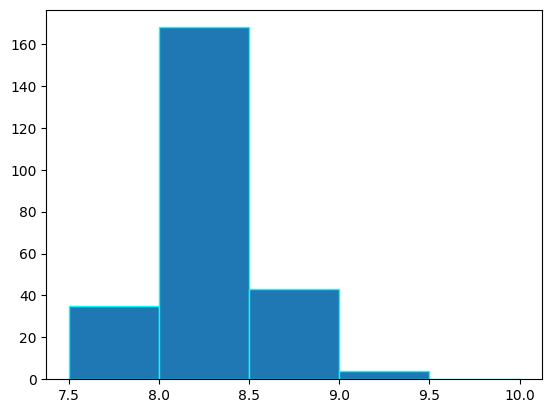

In [124]:

import matplotlib.pyplot as plt
plt.hist(IMDb_Top_250['imdb_score'], bins = 5, range = (7.5,10), edgecolor = 'cyan')
plt.show()

**Subtask 3.4: Find the critic-favorite and audience-favorite actors**

   1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
   2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
   3. Group the combined dataframe using the `actor_1_name` column.
   4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [145]:
# Write your code for creating three new dataframes here
Meryl_Streep = movies[movies["actor_1_name"] == "Meryl Streep"]
Meryl_Streep.shape# Include all movies in which Meryl_Streep is the lead

(11, 14)

In [146]:
Leo_Caprio = movies[movies["actor_1_name"] == "Leonardo DiCaprio"] # Include all movies in which Leo_Caprio is the lead
Leo_Caprio.shape

(21, 14)

In [148]:
Brad_Pitt = movies[movies["actor_1_name"] == "Brad Pitt"]
Brad_Pitt.shape # Include all movies in which Brad_Pitt is the lead

(17, 14)

In [153]:
# Write your code for combining the three dataframes here
Combined = pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt],axis=0)
Combined.shape

(49, 14)

In [176]:
# Write your code for grouping the combined dataframe here
dfgroup = Combined.groupby(["actor_1_name"]).agg({'num_critic_for_reviews':np.mean,'num_user_for_reviews':np.mean})

C:\Users\suddkar\AppData\Local\Temp\ipykernel_59384\1732310573.py:2: FutureWarning: The provided callable <function mean at 0x0000026A7FD2EF20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dfgroup = Combined.groupby(["actor_1_name"]).agg({'num_critic_for_reviews':np.mean,'num_user_for_reviews':np.mean})
C:\Users\suddkar\AppData\Local\Temp\ipykernel_59384\1732310573.py:2: FutureWarning: The provided callable <function mean at 0x0000026A7FD2EF20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dfgroup = Combined.groupby(["actor_1_name"]).agg({'num_critic_for_reviews':np.mean,'num_user_for_reviews':np.mean})


In [177]:
# Write the code for finding the mean of critic reviews and audience reviews here
dfgroup

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,181.454545,297.181818


In [170]:
Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']
Leo_Caprio = movies.loc[movies.actor_1_name == 'Leonardo DiCaprio']
Brad_Pitt = movies.loc[movies.actor_1_name == 'Brad Pitt']
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
Combined_by_segment = Combined.groupby('actor_1_name')

Combined_by_segment['num_user_for_reviews'].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

#### <font color='red'>Question 8: Which actor is highest rated among the three actors according to the user reviews? </font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

#### <font color='red'>Question 9: Which actor is highest rated among the three actors according to the critics?</font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

In [180]:
Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']
Leo_Caprio = movies.loc[movies.actor_1_name == 'Leonardo DiCaprio']
Brad_Pitt = movies.loc[movies.actor_1_name == 'Brad Pitt']
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
Combined_by_segment = Combined.groupby('actor_1_name')

Combined_by_segment['num_critic_for_reviews'].mean()